<a href="https://colab.research.google.com/github/iakshkhurana/UML501-Machine-Learning-Codes/blob/main/cnn-part-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 5x5 input (single channel)
img = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32).reshape(1, 5, 5, 1)   # ✅ reshape here

# CNN with 2x2 filter
model = keras.Sequential([
    layers.Conv2D(1, (2, 2), input_shape=(5, 5, 1))
])

output = model.predict(img)
print("Output shape:", output.shape)
print("Output matrix:\n", output[0, :, :, 0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Output shape: (1, 4, 4, 1)
Output matrix:
 [[0.9901118 1.1692977 1.3484837 1.5276697]
 [1.8860404 2.065227  2.2444134 2.4235988]
 [2.7819705 2.9611568 3.1403422 3.3195286]
 [3.6779003 3.8570852 4.03627   4.2154584]]


In [6]:
# Manual Filtering

import numpy as np

# 5x5 input
img = np.array([
    [1,  2,  3,  4,  5],
    [6,  7,  8,  9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# 2x2 filter (example: edge-like)
filt = np.array([
    [1, -1],
    [-1, 1]
], dtype=np.float32)

# Output size: (5-2+1, 5-2+1) = (4,4)
out = np.zeros((4,4), dtype=np.float32)

# Convolution (valid)
for i in range(4):       # rows
    for j in range(4):   # cols
        region = img[i:i+2, j:j+2]     # 2x2 patch
        out[i,j] = np.sum(region * filt)

print("Output matrix:\n", out)


Output matrix:
 [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


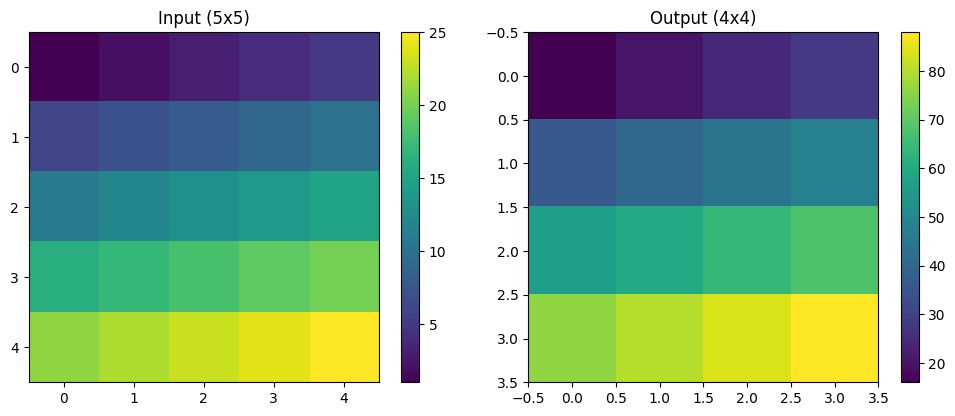

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# 5x5 input (single channel)
img = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32).reshape(1, 5, 5, 1)

# CNN with 2x2 filter
model = keras.Sequential([
    layers.Conv2D(1, (2, 2), input_shape=(5, 5, 1))
])

# --- Fix kernel for deterministic output ---
kernel = np.ones((2, 2, 1, 1), dtype=np.float32)  # 2x2 sum filter
bias   = np.array([0.0], dtype=np.float32)
model.layers[0].set_weights([kernel, bias])

# Forward pass
output = model.predict(img)
out_matrix = output[0, :, :, 0]

# --- Visualization ---
plt.figure(figsize=(10,4))

# Input
plt.subplot(1,2,1)
plt.imshow(img[0,:,:,0], cmap="viridis")
plt.title("Input (5x5)")
plt.colorbar()

# Output
plt.subplot(1,2,2)
plt.imshow(out_matrix, cmap="viridis")
plt.title("Output (4x4)")
plt.colorbar()

plt.tight_layout()
plt.show()


In [9]:
# Pytorch

import torch
import torch.nn as nn

# 5x5 input
img = torch.tensor([
    [1,  2,  3,  4,  5],
    [6,  7,  8,  9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=torch.float32).reshape(1, 1, 5, 5)  # (batch=1, channel=1, H=5, W=5)

# Conv2d: 1 input channel -> 1 output channel, 2x2 kernel
conv = nn.Conv2d(1, 1, kernel_size=2, stride=1, padding=0, bias=True)

# Set weights manually: 2x2 kernel of ones
with torch.no_grad():
    conv.weight[:] = torch.tensor([[[[1, 1],
                                     [1, 1]]]], dtype=torch.float32)
    conv.bias[:] = torch.tensor([0.0])

# Apply convolution
output = conv(img)

print("Input shape:", img.shape)
print("Output shape:", output.shape)
print("Output matrix:\n", output[0, 0].detach().numpy())

Input shape: torch.Size([1, 1, 5, 5])
Output shape: torch.Size([1, 1, 4, 4])
Output matrix:
 [[16. 20. 24. 28.]
 [36. 40. 44. 48.]
 [56. 60. 64. 68.]
 [76. 80. 84. 88.]]
